メモ

非定常時系列データへの分析<br>
[LSTM/RNN ](https://aismiley.co.jp/ai_news/lstm/)<br>
競合他社の影響の変換関数の決め方<br>


# 時系列分析を用いた因果推論の全体像

時間依存性がある場合→共変量・結果・処置に時間的変化がある

このとき、施策が単体・複数の場合に分けられ、そのなかでも

1.   処置・対象が分けられる場合→DiD,SC
2.   分けられない（どちらかがない）場合→時系列分析

時系列分析を用いた因果推論では構造的系列モデルのように、構成要素に分けて解釈できる（**解釈性が高い**）

---
補足：構造的系列モデル

> **観測データ（時系列）を、トレンド・季節性・ノイズなどの「構造的要素」に分解し、それぞれを明示的にモデル化する**時系列手法です。


🧩 モデル構造の例

以下は、典型的なSTSMのモデル例です：

$$
Y_t = \mu_t + \gamma_t + \epsilon_t
$$

* $Y_t$：観測値（時系列データ）
* $\mu_t$：トレンド成分（例：ランダムウォーク）
* $\gamma_t$：季節性成分（サイクルや周期）
* $\epsilon_t$：観測誤差（ホワイトノイズ）

各成分が**状態空間モデル**で記述されるのがポイントです。


 ✅ 構造的系列モデル vs. ARIMAとの違い

| 観点   | 構造的系列モデル           | ARIMAモデル             |
| ---- | ------------------ | -------------------- |
| 解釈性  | 高い（トレンドや季節性が明示）    | 低い（AR, MA項がブラックボックス） |
| 柔軟性  | 高い（時変トレンド、外生変数も対応） | 制限あり                 |
| 推定方法 | 状態空間モデル＋カルマンフィルタ   | 差分＋自己回帰              |
| 利用場面 | 経済、天気、社会データなど      | 単変量系列の短期予測向き         |


# 時系列分析の全体像

抽出するべき情報
*   季節性、周期性
*   トレンド
*   外因性
*   自己相関
*   ノイズ

---

データの性質
*   定常性

1. 弱定常性（Weak Stationarity, Second-order Stationarity）
時系列 ${X_t}$ が**弱定常（または2次定常）**であるとは、以下の条件を満たすことです：

> 平均 $\mathbb{E}[X_t]$ がすべての $t$ で一定（時刻に依存しない）<p>
 分散 $\mathrm{Var}(X_t)$ がすべての $t$ で一定<p>
 共分散 $\mathrm{Cov}(X_t, X_{t+h})$ が時点 $t$ に依存せず、ラグ $h$ だけの関数である（=自己共分散関数が時間移動に対して不変）

2. 強定常性（Strict Stationarity）
時系列 ${X_t}$ が**強定常（または厳密定常）**であるとは：

> 任意の $k$ と任意の時刻 $t_1, t_2, \dots, t_k$ に対して、<p>
(Xt1 ,Xt2,…,Xt k)
の**結合分布（joint distribution）**が、
(Xt 1+h ,Xt 2+h ,…,Xt k+h)
の結合分布と等しいこと。<p>
つまり、「時刻をずらしても確率分布が変わらない」という、より強い意味での定常性です。

3. ガウス型の時系列では：
分布（joint distribution）は平均ベクトルと共分散行列だけで完全に決まる。

したがって、

> 弱定常性（平均と共分散が時間に依存しない）<p>
⇒ 多変量正規分布のパラメータが時間に依存しない<p>
⇒ 結合分布も時間に依存しない<p>
⇒ 強定常性も満たす<p>

---

実行手順

1.データ準備：データ生成の背景によって期間を変える

2.学習：クロスバリデーションを可能であれば行う

3.将来予測

---

時系列モデルの種類

1. 分解不可能なモデル

通常の時系列分析では、時系列データを以下のように**分解（decomposition）**します：　$𝑌𝑡=𝑇𝑡+𝑆𝑡+𝑅𝑡$

$T_t$: トレンド成分（Trend）

$S_t$: 季節成分（Seasonality）

$R_t$: 残差（Noise, Random）

2. 分解不可能なモデル

こうした明確な成分分離ができない、または

成分が非線形・相互作用的に混ざっていて明確に切り出せない

ノイズや外乱、構造変化などが複雑に絡んでいる


2. 分解不可能な時系列への分析アプローチ

こうした難しいケースでは、**分解に頼らず直接予測・構造推定**するような方法を使います。

 🔹 1. 機械学習ベースの時系列モデリング

| 手法                                                               | 特徴                                  |
| ---------------------------------------------------------------- | ----------------------------------- |
| **ランダムフォレスト（RF）やXGBoost**                                        | 特徴量をエンジニアリングして予測：トレンド・季節性は明示的に分解しない |
| **LSTM/GRUなどのRNN**                                               | 長期依存関係を学習。非線形で分解不要                  |
| **Transformer系モデル（e.g., Informer, Temporal Fusion Transformer）** | 時系列の長期予測に強く、複雑なパターンに対応              |
| **NeuralProphet**                                                | 分解に頼らないが、解釈性も多少ある                   |

➡ これらはトレンドや季節性を**自動的に内部で学習**するため、明示的な分解が不要。


 🔹 2. 状態空間モデル・構造時系列モデル（SSM, DLM）

* **Kalmanフィルタ系**の手法で、状態遷移行列で非観測の成分を推定
* たとえば、トレンドがランダムウォーク、季節性が時変成分として組み込まれる

➡ トレンドや季節性が**時間で変わる**ようなケースに強い


 🔹 3. ベイズ的非パラメトリック法（例：BART、GPなど）

* \*\*ベイズ回帰木（BART）**や**ガウス過程（GP）\*\*を用いて柔軟に関数形を学習
* 明示的に \$Y\_t = T\_t + S\_t + \epsilon\_t\$ のような分解をしなくても、
  非線形性や不確実性を捉える


🔹 4. 変化点検出（Change Point Detection）

* 明確に分解できないとき、**構造変化の瞬間**を特定するアプローチ

  * Bayesian Change Point Detection
  * PELT（Pruned Exact Linear Time）
  * Prophet の changepoint モデル など

---

補足：状態空間モデル



 📌 状態空間モデルとは？

**状態**とは観測できない潜在的な変数を指し、**観測値**はその状態からノイズを伴って得られるとみなす枠組みです。モデルは以下の2つの式から構成されます：

1. **システムモデル（状態遷移式）**

   過去の状態 $x_{t-1}$ から現在の状態 $x_t$ を生成します。ここで $v_t$ はシステムノイズです 。

2. **観測モデル（観測値の生成式）**

   状態 $x_t$ に観測ノイズ $w_t$ を加えて得られます 。

線形かつノイズがガウス分布の場合、**カルマンフィルタ**により状態の推定が効率的にできます 。


 ✅ なぜ使うのか？（利点）

* **統一的に扱える**：ARMAモデルや最適制御問題なども、このSSMの形で表現できる ([ism.ac.jp][1])。
* **柔軟な構造導入**：非定常性、非線形性、外的ショック、異常値への対応がしやすい ([ism.ac.jp][1])。
* **幅広い応用**：金融時系列、生態系、気象データ、水準推定、ボラティリティ推定など多岐にわたる ([carf.e.u-tokyo.ac.jp][2])。


 ⚙️ 推定・計算の仕組み

* **カルマンフィルタ**
  線形ガウスモデルで状態の事後平均と共分散を逐次推定 。

* **非線形／非ガウスモデル**

  * **粒子フィルタ（Particle Filter）**
  * **モンテカルロフィルタ**
  * **ガウス和フィルタ**など
    → 金融時系列や生態学での高度な推定に対応 ([ism.ac.jp][1])。

* **パラメータ推定**
  カルマンフィルタを内包した尤度最大化や、状態の平滑化による推定が可能 。


 🧩 応用例

1. **経済・金融**

   * 時変ボラティリティ（Stochastic Volatility）モデル
   * 金利期間構造モデルやCAPMの時変β推定 ([imes.boj.or.jp][3])。

2. **気象・海洋**

   * 観測データと数値モデルを融合する「データ同化」 。

3. **生態・生物モデル**

   * 隠れた生態系の状態推定に状態空間構造を使う 。

4. **季節調整**

   * 消費支出など経済統計の調整に状態空間モデルが使われている 。


 🧠 まとめ：構造と柔軟性を兼ね備えたフレームワーク

* **モデル構造が明示的**：トレンド・季節性・ボラティリティ・異常点などに分解可能。
* **計算手法が豊富**：線形～非線形、ガウス～非ガウスに対応。
* **応用領域が広い**：制御理論、金融工学、環境・エコロジー、経済統計など多領域で活用。


 🔍 次に掘り下げたいテーマ

* **パラメータ推定と平滑化技術**
* **非線形／非ガウスへの適用事例**


[1]: https://www.ism.ac.jp/editsec/toukei/pdf/67-2-181.pdf?utm_source=chatgpt.com "[PDF] 時系列解析における状態空間モデルの利用 - 統計数理研究所"
[2]: https://www.carf.e.u-tokyo.ac.jp/admin/wp-content/uploads/2011/09/5thcarfseminar20110926sato.pdf?utm_source=chatgpt.com "モンテカルロ・フィルタを用いた金融時系列分析"
[3]: https://www.imes.boj.or.jp/research/papers/japanese/kk18-b1-1.pdf?utm_source=chatgpt.com "[PDF] 一般化状態空間モデルによる 分散変動時系列の解析"


In [ ]:
'''
時系列モデルを用いたAutoMLの実装
Q.今後2年間の乗客数の推移はどの程度か？（精度が高ければOK）
'''
!pip install pycaret

In [ ]:
from pycaret.datasets import get_data
airline = get_data('airline')#飛行機の乗客数推移データ

,Number of airline passengers
Period,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [ ]:
'''
pycret_setup functionの引数： https://qiita.com/Asagumo63/items/99357d4b472a9219040e

fh;予測する時点数　今回は12ヶ月
session_id;乱数シード
fold;クロスバリデーションの分割数
fold_strategy;クロスバリデーションの分割方法
'''

from pycaret.time_series import *
exp_name = setup(data = airline, fh = 12, session_id = 1, fold = 3, fold_strategy = 'expanding')

,Description,Value
0,session_id,1
1,Target,Number of airline passengers
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(144, 1)"
5,Transformed data shape,"(144, 1)"
6,Transformed train set shape,"(132, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
#いったんARIMAで回帰
#ARIMA,SMAPEに関する説明は最後で
arima = create_model('arima')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,1956-12,0.4462,0.4933,13.0286,16.1485,0.0327,0.0334,0.9151
1,1957-12,0.5983,0.5993,18.2920,20.3442,0.0506,0.0491,0.8916
2,1958-12,1.0044,0.9280,28.6999,30.1669,0.0671,0.0697,0.7964
Mean,NaT,0.6830,0.6735,20.0069,22.2199,0.0501,0.0507,0.8677
SD,NaT,0.2356,0.1851,6.5117,5.8746,0.0141,0.0148,0.0513


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
#学習期間中のデータ可視化
plot_model(plot = 'ts')

In [ ]:
#実測、季節性、トレンド、残差に分けて出力
plot_model(plot='decomp')

In [ ]:
#将来予測：fh=24...24ヶ月分
plot_model(estimator = arima, plot = 'forecast', data_kwargs = {'fh' : 24})

In [ ]:
#ほかのモデルと比較
best_model = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
exp_smooth,Exponential Smoothing,0.5852,0.6105,17.1926,20.1633,0.0435,0.0439,0.8918,0.1300
ets,ETS,0.5931,0.6212,17.4165,20.5102,0.0440,0.0445,0.8882,0.2133
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6192,0.6828,18.3006,22.6152,0.0458,0.0456,0.8623,0.7667
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.6804,0.7348,20.0340,24.2961,0.0516,0.0514,0.8438,0.7700
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.6813,0.7866,20.0334,25.9670,0.0491,0.0499,0.8113,0.6200
arima,ARIMA,0.6830,0.6735,20.0069,22.2199,0.0501,0.0507,0.8677,0.2100
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7004,0.7702,20.6084,25.4401,0.0509,0.0514,0.8215,0.5800
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7004,0.7703,20.6086,25.4405,0.0509,0.0514,0.8215,0.5300
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7029,0.7732,20.6816,25.5362,0.0511,0.0516,0.8201,0.4033
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,0.7048,0.7751,20.7373,25.6005,0.0512,0.0517,0.8193,0.7567


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

[補足]　ARIMAとは？

ARIMA（AutoRegressive Integrated Moving Average）モデルは、過去の値と誤差を組み合わせて現在の値を予測する時系列モデルである。ARIMAは3つの要素から成る：

* 自己回帰（AR：AutoRegressive）：過去の値との関係を使う
* 差分化（I：Integrated）：非定常データを定常にするための差分
* 移動平均（MA：Moving Average）：過去の誤差との関係を使う

ARIMAモデルは以下のような一般形で表される：

$$
\phi(B)(1 - B)^d y_t = \theta(B) \epsilon_t
$$

ここで

* $y_t$：時系列データ
* $\phi(B)$：AR（自己回帰）項のラグ多項式（例えば $\phi(B) = 1 - \phi_1 B - \dots - \phi_p B^p$）
* $(1 - B)^d$：d階の差分化（非定常成分を除去）
* $\theta(B)$：MA（移動平均）項のラグ多項式（$\theta(B) = 1 + \theta_1 B + \dots + \theta_q B^q$）
* $\epsilon_t$：ホワイトノイズ
* $B$：バックシフト演算子（$B y_t = y_{t-1}$）

このように、ARIMA(p, d, q)モデルでは、$d$回の差分をとった系列に対してAR(p)とMA(q)の構造を組み合わせることで、系列の傾向や周期性、誤差構造を捉える。

ARIMAモデルの予測性能を評価する指標の一つにSMAPE（Symmetric Mean Absolute Percentage Error）がある。これはMAPE（Mean Absolute Percentage Error）と類似しているが、より対称的かつ安定性のある評価を目的としている。

MAPEは以下の式で定義される：

$$
\text{MAPE} = \frac{1}{n} \sum_{t=1}^n \left| \frac{y_t - \hat{y}_t}{y_t} \right| \times 100
$$

ここで、$y_t$は実測値、$\hat{y}_t$は予測値である。MAPEは直感的で解釈しやすいが、$y_t = 0$に近づくと誤差が非常に大きく評価され、場合によっては定義できなくなるという欠点がある。

一方で、SMAPEは予測値と実測値の絶対値の平均を分母に取ることで、0や小さな値への依存性を抑え、予測誤差の過小評価と過大評価を対称的に扱うことができる。定義は以下の通りである：

$$
\text{SMAPE} = \frac{1}{n} \sum_{t=1}^n \frac{|y_t - \hat{y}_t|}{(|y_t| + |\hat{y}_t|)/2} \times 100
$$

SMAPEは分母が0になる（例えば $y_t = \hat{y}_t = 0$）場合に注意が必要であるものの、MAPEよりも安定しているという利点がある。また、誤差の対称性が保証されるため、評価バイアスが抑制されやすい。

実務上では、予測対象の時系列が0に近い値をとるかどうか、あるいは大きな外れ値に敏感かどうかなどに応じて、MAPEとSMAPEを使い分ける必要がある。特に需要予測や欠損の多い系列ではSMAPEがよく用いられる。ARIMAモデルの予測性能を適切に評価するためには、モデルの構造だけでなく、指標の性質を理解して選択することが重要である。


# 時系列分析の因果推論への適用

1.構造的時系列モデルに対する因果推論の仮定の適用

*   条件付き独立：共変量の条件の下で処置と結果（潜在的結果変数）は独立

　　→COVID-19のような場合における分布シフトに注意
*   正値性（when対照-処置群）

　　→対照群の時系列データがないため、推定値に対して正値性の確認をする
*   SUTVA条件（一致性）

　　→・マルコフ性（１つ前にのみ影響を受ける）の仮定は現実では成立しない…残存効果を考慮

　　　・各施策同士が影響…例：TVCMと検索広告

　　　・施策の一致性…TVCMでも様々なパターン、それぞれ別として認識すると、各データが小さくなる/多重共線性などの問題が発生



## 単体施策の効果

###Causal Impact の概要

**Causal Impact（因果インパクト）**は、Google社が開発した**ベイズ的構造時系列モデル**を用いた因果推論手法です。特に「ある介入（例：広告出稿、制度変更など）が、時系列にどのような影響を与えたか」を推定するために用いられます。数学的には、\*\*状態空間モデル（State Space Model）とベイズ推定（MCMC）\*\*に基づいています。

---

 1. 問題設定の数式的枠組み

まず、観測される時系列 $y_t$ に対して、介入がなければどのような値になっていたか、**反実仮想の時系列（counterfactual）** $y_t^{(0)}$ を推定します。観測された値 $y_t^{(1)}$ と比較して因果効果を測定します。

$$
\text{Impact}_t = y_t^{(1)} - y_t^{(0)}
$$

この反実仮想 $y_t^{(0)}$ をどう推定するかがCausal Impactの核心です。

---

 2. モデル構造：**構造的時系列モデル**

Causal Impactは以下の形式の状態空間モデルを用いて、介入前のデータをもとに介入後の**反実仮想系列**をベイズ的に生成します。

 観測方程式（Observation equation）：

$$
y_t = \mathbf{X}_t \beta + \mu_t + \epsilon_t, \quad \epsilon_t \sim \mathcal{N}(0, \sigma^2)
$$

* $y_t$：目的時系列（例：売上など）
* $\mathbf{X}_t$：共変量の系列（例：他商品の売上や季節要因）
* $\beta$：共変量の係数
* $\mu_t$：ローカルレベル（trend）成分（ランダムウォーク）
* $\epsilon_t$：観測誤差

 状態方程式（State equations）：

$$
\mu_{t} = \mu_{t-1} + \eta_t, \quad \eta_t \sim \mathcal{N}(0, \tau^2)
$$

これはローカルレベルモデル（Local Level Model）であり、トレンドが時間とともにランダムに変動できるようになっています。

---

 3. 介入の取り扱いと反実仮想の生成

介入時点を $T_0$ とすると、$t \leq T_0$ の期間（介入前）を使ってモデルを訓練し、$t > T_0$ における $y_t^{(0)}$（介入がなかったときの予測値）をベイズ的に推定します。

$$
p(y_t^{(0)} \mid y_{1:T_0}, \mathbf{X}_{1:T}) \quad \text{for } t > T_0
$$

その後、観測された実値 $y_t^{(1)}$ と予測値 $y_t^{(0)}$ を比較して因果効果（Impact）を算出します。

---

 4. 推論：ベイズ的アプローチとMCMC

* モデルパラメータ $\beta, \sigma^2, \tau^2$ は**事前分布**を仮定してベイズ推論で求めます。
* 推論には\*\*MCMC（マルコフ連鎖モンテカルロ法）\*\*が用いられ、介入後の予測分布も事後分布として得られます。
* そのため、**効果量の点推定だけでなく信用区間（credible interval）も得られる**のが大きな特徴です。

---

 5. 因果効果の統計的評価

* 時点ごとの効果：$\hat{y}_t^{(1)} - \hat{y}_t^{(0)}$
* 累積効果：$\sum_{t=T_0+1}^{T_1} (y_t^{(1)} - y_t^{(0)})$
* 信用区間：各効果の不確かさを反映した区間推定

介入によって得られた効果が有意かどうかは、**0を含むかどうか**や**p値的な解釈**で評価されます（ベイズ的には事後確率で判断）。

---

 まとめ

* Causal Impactは、**ベイズ状態空間モデルを使って反実仮想の時系列を生成**し、介入の因果効果を定量的に測定する手法。
* 数学的には、\*\*観測方程式＋状態方程式＋ベイズ推論（MCMC）\*\*という3要素から構成されている。
* 他の因果推論手法（DIDやPSMなど）と異なり、**時系列の構造や不確かさを明示的に扱える**のが特徴であり、**個別の介入を動的に評価する**場面に強い。



###コード

In [ ]:
!pip install tfcausalimpact

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 60.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


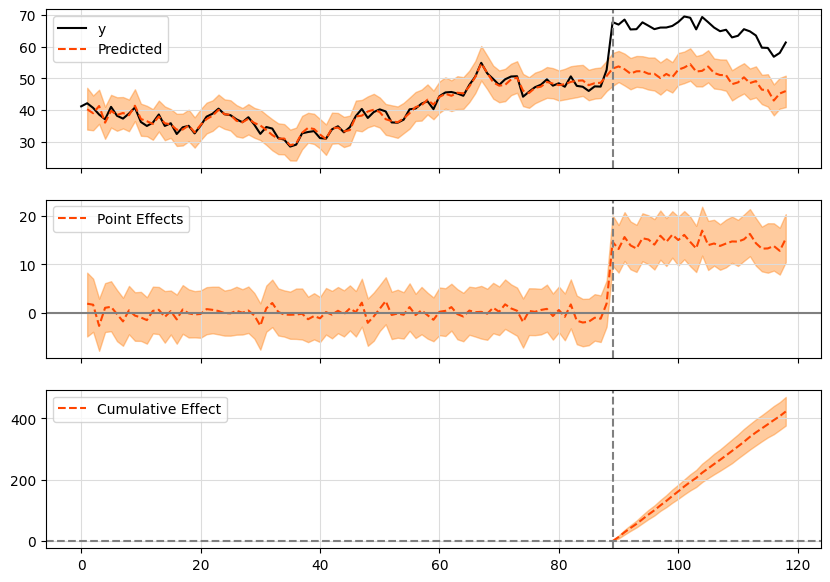

In [ ]:
'''
Q.製品のキャンペーン開始後の１か月の売り上げ増加効果はどれくらいか？
'''
import numpy as np
import pandas as pd
from statsmodels.tsa.arima_process import ArmaProcess
from causalimpact import CausalImpact

# 乱数シードの固定
np.random.seed(1)

# ARMAモデル(補足)で共変量x1（気温データ）を生成
'''
重要：共変量（気温）は処置変数（キャンペーン）に影響を受けない
'''
ar = np.array([1, -0.99]) #AR(自己回帰)過程のパラメータを定義。この例ではAR(1)過程を指定しており、係数は-0.99。AR(1)過程は現在の値が1時点前の値に依存する関係を表す。
                          #->時間軸方向での一致性が担保（１つ前にのみ影響を受ける：d-分離）
ma = np.array([1]) #MA(移動平均)過程のパラメータを定義。この例ではMA(0)過程、つまり移動平均成分がないことを意味する。
arma_process = ArmaProcess(ar, ma) #ARMA(自己回帰移動平均)過程を定義。この過程は ar と ma のパラメータを使用。
x1 = 20 + arma_process.generate_sample(nsample=120) #ARMA過程を使用して120個のサンプルを生成し、それぞれの値に20を加える。これにより、生成された時系列データ x1 が得られる。

# x1に関連する結果変数yを生成
y = 2 * x1 + np.random.normal(0, 1, 120) #x1の各値を2倍し、標準正規分布（平均0、分散1）から生成されたランダムノイズを加えることで計算
y[90:] += 15 # 91番目以降(キャンペーン開始後1か月間)にキャンペーン効果(+15)を上乗せ

# データを結合
df = pd.DataFrame({'y': y, 'x1': x1})

# キャンペーン前と後の期間を設定
pre_period = [1, 90] # キャンペーン前3か月間
post_period = [91, 119] # キャンペーン後1か月間

# CausalImpactを使用して学習・推定
ci = CausalImpact(df, pre_period, post_period)

#結果の可視化
ci.plot()

'''
上段：実測値と予測値
中段：実測値と予測値の差分
下段：累積の因果効果（補足）
'''

In [ ]:
#推定結果の要点を出力
print(ci.summary())

'''
Actual:実際の処置後の平均・累積値
Predistion(s.d.):処置がなかった時の予測される平均・累積
95%CI:95%ベイズ信用区間（補足）
Absolute effect:観測値と予測値の差分
Relative effect:観測値と予測値の差分を標準化したもの(観測値でわったもの)
---
考察
・販売数が平均で14.58個（28.56％）増加
・95%信用区間で増加幅は12.67~16.15
・累積効果として１か月で418.6個の追加販売があった可能性
・処置後の実測値（64.97）が信用区間[48.82, 52.3]に入っていない→処置がなければ結果は起こらなかった（因果効果の可能性）
'''

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    64.97              1884.2
Prediction (s.d.)         50.54 (0.89)       1465.6 (25.77)
95% CI                    [48.82, 52.3]      [1415.83, 1516.84]

Absolute effect (s.d.)    14.43 (0.89)       418.6 (25.77)
95% CI                    [12.67, 16.15]     [367.36, 468.37]

Relative effect (s.d.)    28.56% (1.76%)     28.56% (1.76%)
95% CI                    [25.07%, 31.96%]   [25.07%, 31.96%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


###[補足]



---

 **累積の因果効果（Cumulative Causal Effect）**

Causal Impactは、**ある介入（例えば広告出稿）が、観測対象の系列（売上など）に与えた影響**を推定します。推定されるのは、介入がなければ得られていたであろう**反実仮想の時系列** $y_t^{(0)}$ と、実際に観測された系列 $y_t^{(1)}$ の差です。

 時点ごとの因果効果（pointwise effect）:

$$
\delta_t = y_t^{(1)} - y_t^{(0)}
$$

 累積の因果効果（cumulative effect）:

$$
\Delta = \sum_{t=T_0+1}^{T_1} \delta_t = \sum_{t=T_0+1}^{T_1} \left(y_t^{(1)} - y_t^{(0)}\right)
$$

* これは、「介入がなければ得られなかった**全体としての効果の合計**」を意味します。
* 例えば広告の影響で売上が10日間で合計+500万円増加した、というのがこの「累積因果効果」です。
* Causal Impactでは、これに加えて\*\*ベイズ推論による信頼区間（信用区間）\*\*も同時に提示されます。

---

 **ARMAとは何か**

ARMA（自己回帰移動平均モデル, AutoRegressive Moving Average）は、**時系列の自己相関構造を捉えるためのモデル**です。Causal Impactの中では、目的変数（時系列データ）の「傾向」や「ノイズの構造」を捉えるために、しばしば**状態空間モデルの一部としてARMA的構造が使われます**。

ARMAモデルは以下のように表されます：

$$
y_t = \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{q} \theta_j \epsilon_{t-j} + \epsilon_t
$$

* $\phi_i$：AR（自己回帰）係数
* $\theta_j$：MA（移動平均）係数
* $\epsilon_t$：ホワイトノイズ

これは、現在の値が**過去の値と過去の誤差**の両方に依存して決まるというモデルです。



 ARIMAとの違い

ARIMA（自己回帰和分移動平均モデル）は、**非定常な時系列**に対応するために、ARMAモデルに「差分操作（差分階数 $d$）」を加えたものです。

ARIMA($p, d, q$) とは：

$$
\Delta^d y_t = \sum_{i=1}^p \phi_i \Delta^d y_{t-i} + \sum_{j=1}^q \theta_j \epsilon_{t-j} + \epsilon_t
$$

* 差分演算 $\Delta^d y_t = (1 - B)^d y_t$ によってトレンドなどを除去。
* 定常でない時系列を定常にしてからARMAモデルを適用。

---

**信用区間**

信用区間とは、ベイズ推定によって得られた **事後分布（posterior distribution）** から、ある確率質量（通常95%）を含むように切り出された区間です。

たとえば：

> 「介入効果の95%信用区間が \[10, 30]」とは、
> **“介入効果が10〜30の範囲にある確率が95%である”**
> という意味です。


 2. 数式で表すと

あるパラメータ $\theta$ の事後分布 $p(\theta | \text{data})$ に対して、

95%信用区間 $[a, b]$ とは：

$$
P(a \leq \theta \leq b \mid \text{data}) = 0.95
$$

この区間は以下の方法で求められます：

* **等尾（equal-tailed）信用区間**

  $$
  \int_{-\infty}^{a} p(\theta | \text{data}) \, d\theta = 0.025,\quad
  \int_{-\infty}^{b} p(\theta | \text{data}) \, d\theta = 0.975
  $$
* **HPD（Highest Posterior Density）区間**（最も確からしい領域）
  密度が高い部分を優先して区間を構成



 3. 頻度的な信頼区間との違い

| 項目  | 信頼区間（Frequentist CI） | 信用区間（Bayesian CI）     |
| --- | -------------------- | --------------------- |
| 解釈  | 無限回試行のうち○%の区間が真値を含む  | 事後分布で○%の確率で真値がこの区間内   |
| ベース | 点推定＋標本分布（漸近理論）       | 事後分布（データ＋事前分布）        |
| 方法  | t分布や正規分布などで計算        | MCMCでサンプリングして分布から直接算出 |



 4. Causal Impactにおける役割

Causal Impactでは、介入による「推定効果」だけでなく、それが**どの程度確からしいか**を示すために信用区間を出力します。

例えば：

```
累積因果効果: +500（95%信用区間：[+200, +800]）
```

このような表示は：

* 介入がなければ 200〜800 の売上増加は起こらなかった可能性が高い
* この区間に 0 が含まれていないので、**統計的に有意な介入効果**があったと解釈できる




### Causal Impactの結果の確認

・分布シフトの確認（共変量が処置の影響を受けなかったことを確認）

・残差の分析（残差がランダム化確認）

・残差の自己相関の確認（モデルが時系列の依存性をとらえらているか確認）


---
 ■ 残差とは何か？

残差 $e_t$ は「**観測値と予測値の差**」です：

$$
e_t = y_t - \hat{y}_t
$$

ここで $\hat{y}_t$ はモデルで予測された値です。


 ■ 残差に自己相関があるとは？

自己相関がある = 「残差の値が過去の残差と統計的に関連している」ことです。
つまり、

$$
\text{Corr}(e_t, e_{t-1}) \neq 0
$$


 ■ 自己相関がある場合、何が言えるか？

自己相関が**ある**ということは：

> モデルが「まだ説明しきれていない時間的パターン（構造）」が残っている

という意味になります。すなわち、

* モデルが系列内の依存性を捉え切れていない
* 予測や因果推論の信頼性が落ちる



 ■ 自己相関がない場合、何が言えるか？

残差に自己相関が**ない**なら：

> モデルが系列内のパターンを十分に説明しており、残りは**ホワイトノイズ**（ランダム）だけになっている

ということになります。


---

・信用区間と実測値

・感度分析（コントロール変数の変更・データ期間の変更）

・外部要因の影響を確認

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20849 (\N{CJK UNIFIED IDEOGRAPH-5171}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22793 (\N{CJK UNIFIED IDEOGRAPH-5909}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_f

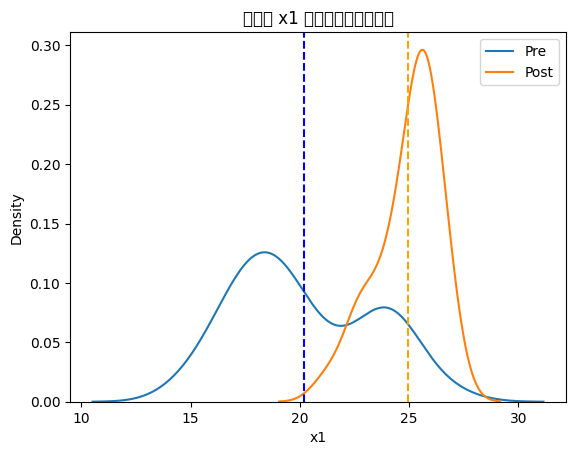

In [ ]:
#① 分布シフトの確認（共変量が処置の影響を受けなかったか）
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(df['x1'].iloc[pre_period[0]:pre_period[1]+1], label='Pre')
sns.kdeplot(df['x1'].iloc[post_period[0]:post_period[1]+1], label='Post')
plt.axvline(df['x1'].iloc[pre_period[0]:pre_period[1]+1].mean(), color='blue', linestyle='--')
plt.axvline(df['x1'].iloc[post_period[0]:post_period[1]+1].mean(), color='orange', linestyle='--')
plt.title('共変量 x1 の分布（処置前後）')
plt.legend()
plt.show()

## 複数施策の効果

**🔷 モデル構造（ＭＭＭ）**

時点 $t$ における売上を以下のように分解します：

$$
\text{売上}_t = \underbrace{\beta_0}_{\text{切片}} +
\underbrace{\sum_{m=1}^M \beta_m \cdot \text{MediaEffect}_{t,m}}_{\text{各メディアの売上影響}} +
\underbrace{\sum_{k=1}^K \gamma_k \cdot z_{t,k}}_{\text{メディア以外の売上影響}} +
\underbrace{\tau_t}_{\text{トレンド項}} +
\underbrace{s_t}_{\text{季節項}} +
\underbrace{\varepsilon_t}_{\text{誤差項}}
$$

---

**🔶 各要素の数理的詳細**

1. 形状効果（Saturation / Hill関数）

施策の効果は**飽和特性**を持ち、投資量が増加しても効果は次第に頭打ちになります。これを Hill関数で次のようにモデル化します：

$$
\text{Hill}(x; S_m, K_m) = \frac{x^{S_m}}{x^{S_m} + K_m^{S_m}} \quad \in (0, 1)
$$

* $x$：変換対象の入力（例：施策投入量）
* $S_m > 0$：**傾斜パラメータ**。値が大きいと急速に飽和
* $K_m > 0$：**半飽和点**。効果が 0.5 に達する投入量
* 性質：$x \to \infty$ で $\text{Hill}(x) \to 1$

この関数は「**非線形の逓減リターン効果**」を記述します。



2. アドストック効果（Adstock / Carry-over）

メディア施策の効果はその期間だけでなく、**後日まで余韻が残る**ため、加重移動平均（adstock）で表現されます。

$$
\text{Adstock}_{t,m} = \sum_{\ell=0}^{L_m} \omega_{m,\ell} \cdot x_{t-\ell,m}
$$

ここで重み $\omega_{m,\ell}$ は以下の減衰関数で定義：

$$
\omega_{m,\ell} = \frac{\ell^{\theta_m} \cdot \alpha_m^\ell}{\sum_{j=0}^{L_m} j^{\theta_m} \cdot \alpha_m^j}
$$

* $x_{t-\ell,m}$：$\ell$日前のメディア $m$ の投下量
* $\alpha_m \in (0,1)$：**減衰パラメータ**。値が大きいと効果が長続き
* $\theta_m \ge 0$：**遅延パラメータ**。ピークが遅れるほど効果が大きくなる
* $L_m$：最大キャリーオーバー期間

Adstockにより、**効果の持続性とピーク遅延**が表現されます。



3. 競合効果（Competitive Effect）

競合メディアの投入が自社の売上に**負の影響を与える**と仮定し、以下のように表現します：

$$
\text{CompEffect}_{t,j} = \delta_j \cdot g(W_{t,j})
$$

* $W_{t,j}$：時点 $t$ における**競合 $j$** の広告量（例：費用・クリック数）
* $g(\cdot)$：競合広告の変換関数（例：$\log(1 + W_{t,j})$）
* $\delta_j < 0$：**負の係数**。競合の効果は売上を減少させると仮定

この項によって、**競合の妨害効果**を構造的に取り入れます。

---

最終モデル数式（すべての効果を統合）

以下に最終的なモデルを数式で定義します：

$$
\text{売上}_t =
\beta_0 +
\sum_{m=1}^M \beta_m \cdot
\underbrace{
\text{Hill} \left(
\sum_{\ell=0}^{L_m} \omega_{m,\ell} \cdot x_{t-\ell,m};
\ S_m,\ K_m
\right)}_{\text{メディア$m$の形状・アドストック効果}} +
\sum_{k=1}^K \gamma_k \cdot z_{t,k} +
\sum_{j=1}^J \delta_j \cdot g(W_{t,j}) +
\tau_t + s_t + \varepsilon_t
$$



変数一覧まとめ

| 記号                | 内容            | 意味                |
| ----------------- | ------------- | ----------------- |
| $x_{t,m}$         | メディア$m$の投下量   | 例：TV広告費、Webバナー数など |
| $z_{t,k}$         | メディア以外の変数     | 例：価格、販促、天気、曜日など   |
| $W_{t,j}$         | 競合$j$のメディア投下量 | 例：競合AのYouTube広告費  |
| $\beta_0$         | 切片            | ベース売上             |
| $\beta_m$         | メディアの効果係数     | 増分売上への影響度         |
| $\gamma_k$        | 非メディア変数の係数    | 販促などの影響           |
| $\delta_j$        | 競合変数の係数（負）    | 競合による売上減効果        |
| $\omega_{m,\ell}$ | アドストック重み      | 過去投下量の影響度         |
| $S_m, K_m$        | Hill関数パラメータ   | 飽和特性を制御           |
| $\alpha_m$        | 減衰パラメータ       | 効果の残存度合い          |
| $\theta_m$        | 遅延パラメータ       | 効果のピーク遅れ          |
| $\tau_t$          | トレンド項         | 長期的な需要成分          |
| $s_t$             | 季節項           | 曜日・月などの周期要素       |
| $\varepsilon_t$   | 誤差            | その他説明できないノイズ      |




In [1]:
'''
Q.TV、Webそれぞれの広告費用対効果はどれくらいか？
'''
!pip install pymc_marketing==0.2.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 kB 1.2 MB/s eta 0:00:00


In [2]:
!pip install "numpy<2.0"
!pip install --upgrade pymc pymc-marketing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.4/275.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 20.5 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
^C


In [1]:
import warnings #Pythonでの警告メッセージを制御するためのライブラリ
import arviz as az #統計モデルの診断と可視化のためのライブラリ
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm #ベイズモデリングのためのライブラリ
import seaborn as sns
from pymc_marketing.mmm.transformers import geometric_adstock, logistic_saturation #幾何学的アドストック関数とロジスティック飽和関数をインポート
#from pymc_marketing.mmm.delayed_saturated_mmm import MMM  # モジュール名 + クラス
# またはシンプルに統合ファイルから直接
from pymc_marketing.mmm import MMM #MMMで使用する関数#DelayedSaturatedMMM is deprecated

warnings.filterwarnings("ignore") #Pythonの警告メッセージを表示しないように設定
az.style.use("arviz-darkgrid") #arvizのデフォルトスタイルを "arviz-darkgrid"に設定
plt.rcParams["figure.figsize"] = [12, 7]
plt.rcParams["figure.dpi"] = 100

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

/usr/local/lib/python3.11/dist-packages/pytensor/tensor/random/op.py:83: FutureWarning: ndim_supp is deprecated. Provide signature instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytensor/tensor/random/op.py:93: FutureWarning: ndims_params is deprecated. Provide signature instead.
  warnings.warn(


Number of observations: 178


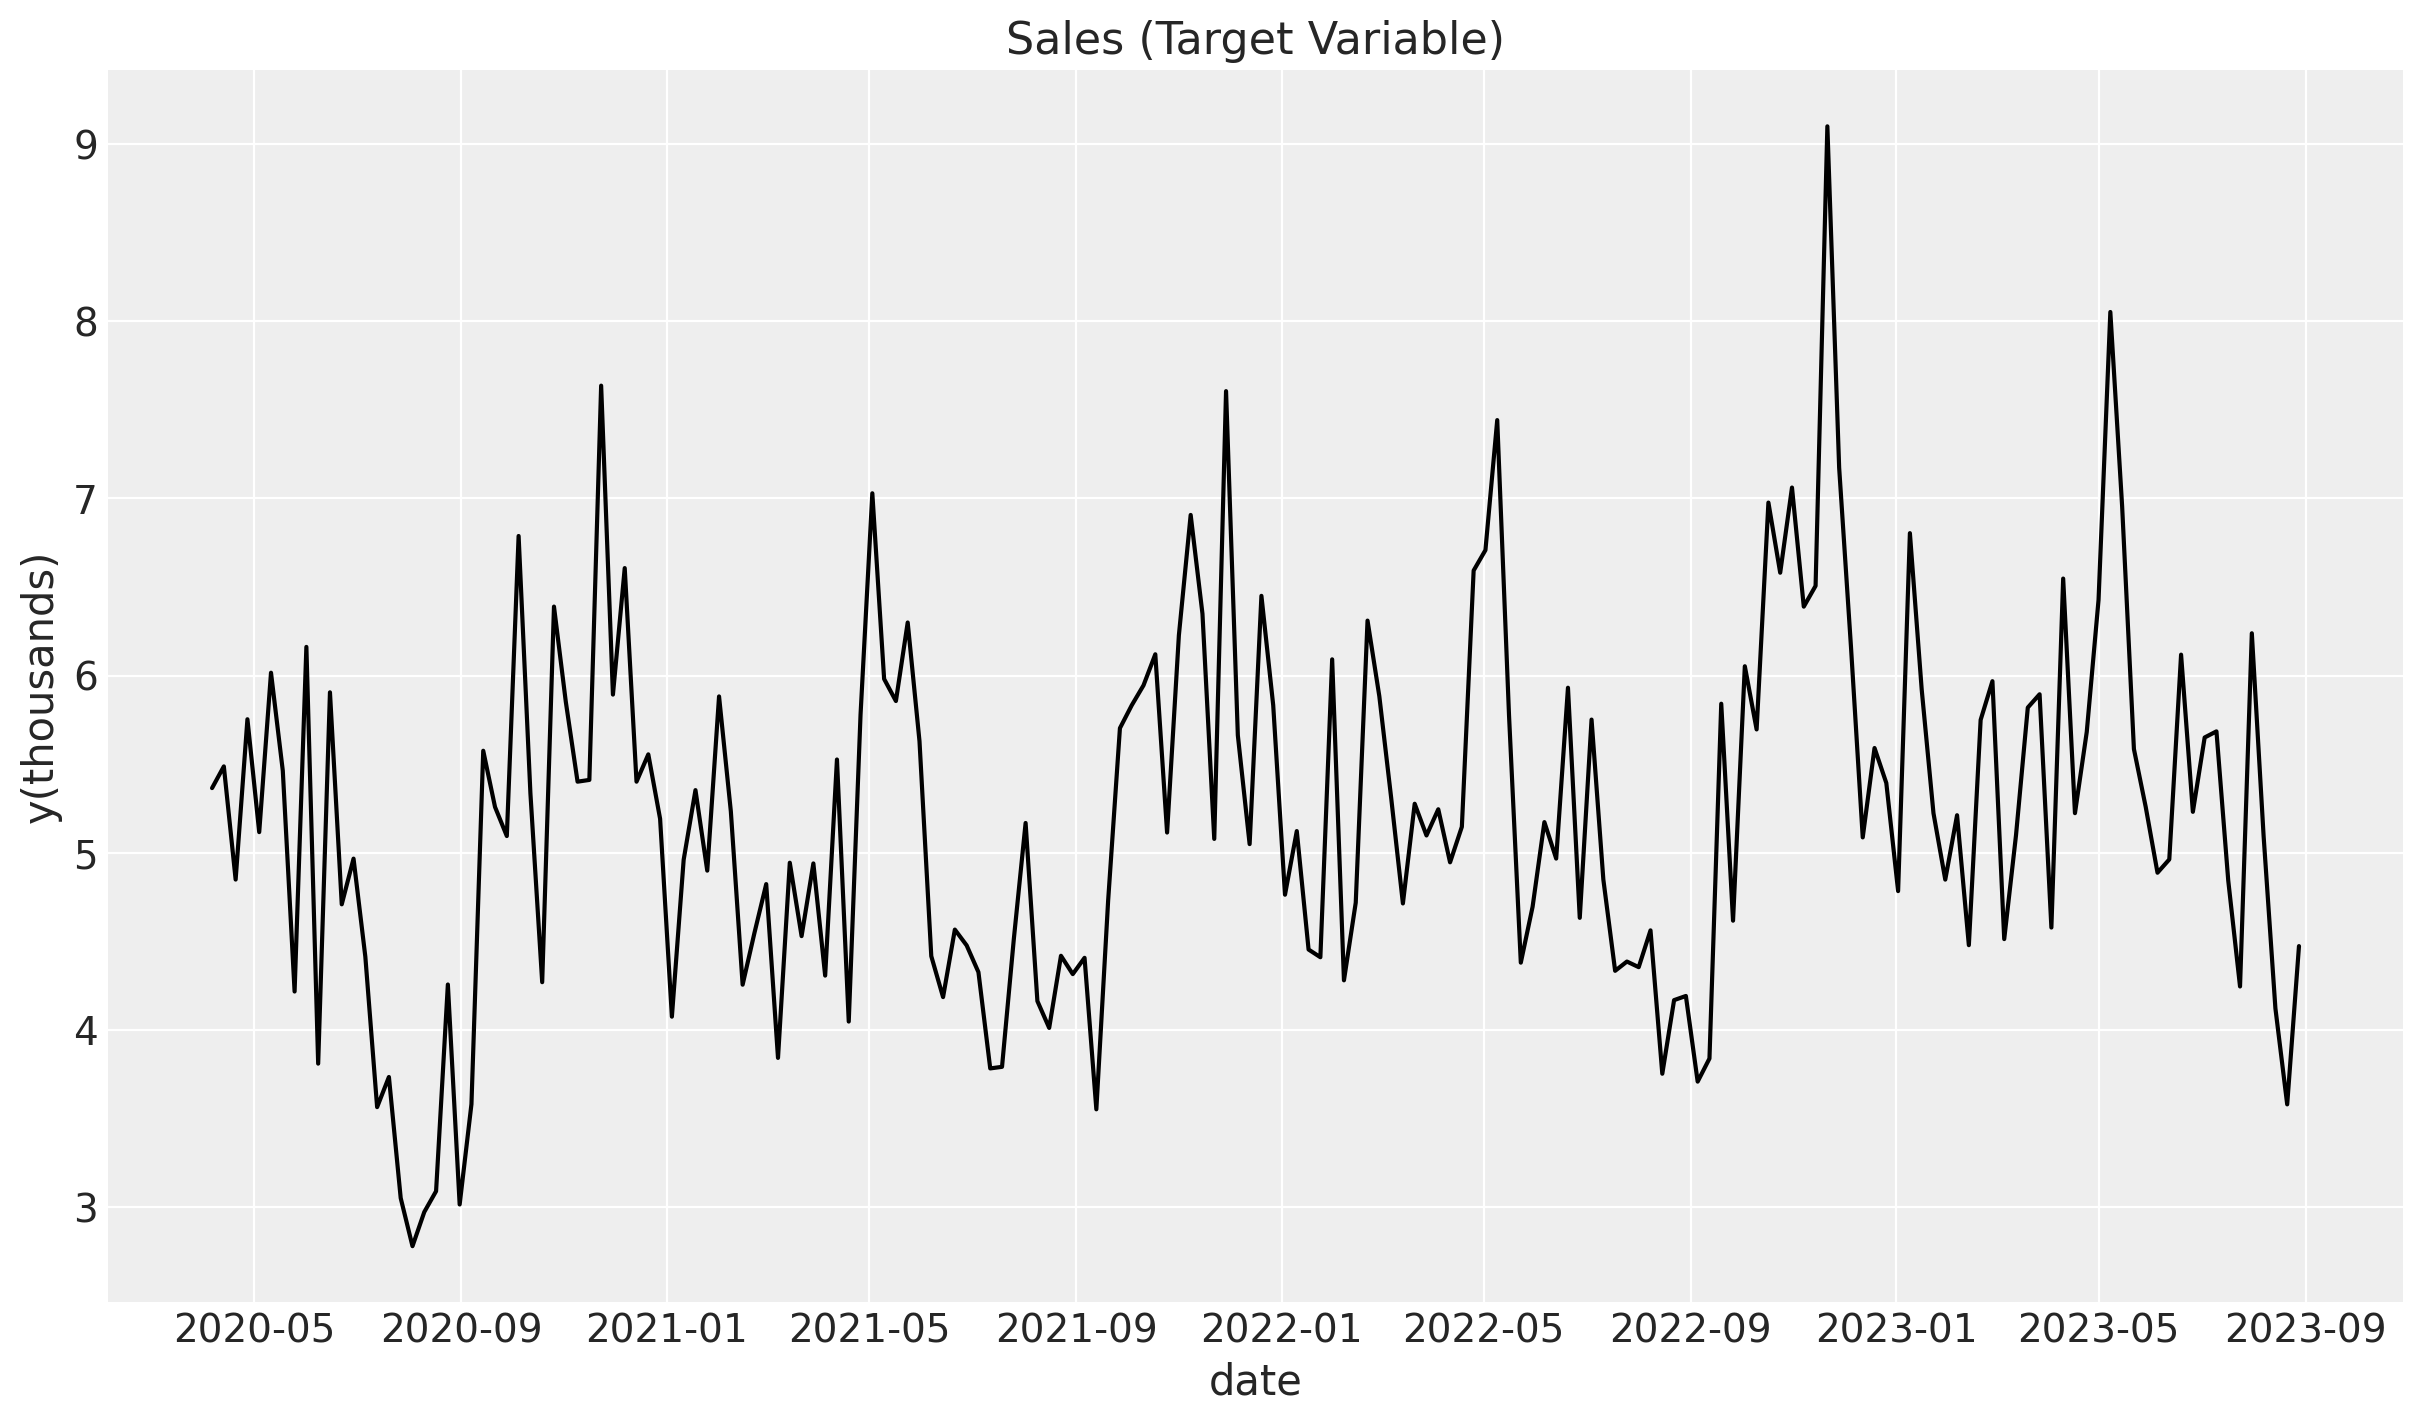

In [2]:
#Generate Data

rng: np.random.Generator = np.random.default_rng(seed=1) #乱数生成の再現性を保証するためにシードを1に設定

# データの期間（週次データを使用）
min_date = pd.to_datetime("2020-04-01") #最小日付を2020年4月1日に設定
max_date = pd.to_datetime("2023-09-01") #最大日付を2023年9月1日に設定

# 指定された期間の週次データを含むデータフレームを作成し、年、月、日の情報を追加
df = pd.DataFrame(
data={"date_week": pd.date_range(start=min_date, end=max_date, freq="W-MON")}).assign(
    year=lambda x: x["date_week"].dt.year,
    month=lambda x: x["date_week"].dt.month,
    dayofyear=lambda x: x["date_week"].dt.dayofyear,
)

n = df.shape[0]
print(f"Number of observations: {n}")

tv = rng.uniform(low=0.0, high=1.0, size=n) #一様分布からランダムなTVデータを生成
df["tv"] = np.where(tv > 0.9, tv, tv / 2) #TVの広告費データをデータフレームに追加し、一定の条件に基づいて値を変更
web = rng.uniform(low=0.0, high=1.0, size=n) #同様に、一様分布からランダムなWebの広告費データを生成
df["web"] = np.where(web > 0.8, web, 0) #Webデータをデータフレームに追加し、一定の条件に基づいて値を変更

# アドストック用のパラメータを設定
alpha1: float = 0.4
alpha2: float = 0.2

#TVとWebデータに対してアドストック効果に基づく変換を適用
df["tv_adstock"] = (geometric_adstock(x=df["tv"].to_numpy(), alpha=alpha1, l_max=8,normalize=True).eval().flatten())
df["web_adstock"] = (geometric_adstock(x=df["web"].to_numpy(), alpha=alpha2, l_max=8,normalize=True).eval().flatten())

# 形状パラメータを設定
lam1: float = 4.0
lam2: float = 3.0

# TVとWebのアドストックデータに対して形状効果に基づく変換を適用
df["tv_adstock_saturated"] = logistic_saturation(
    x=df["tv_adstock"].to_numpy(), lam=lam1
    ).eval()
df["web_adstock_saturated"] = logistic_saturation(
    x=df["web_adstock"].to_numpy(), lam=lam2
    ).eval()

# トレンド項をデータフレームに追加
df["trend"] = (np.linspace(start=0.0, stop=50, num=n) + 10) ** (1 / 4) - 1

# 季節項の計算を行い、データフレームに追加
df["cs"] = -np.sin(2 * 2 * np.pi * df["dayofyear"] / 365.5)
df["cc"] = np.cos(1 * 2 * np.pi * df["dayofyear"] / 365.5)
df["seasonality"] = 0.5 * (df["cs"] + df["cc"]) #季節項

# イベント項、切片、誤差項をデータフレームに追加
df["event_1"] = (df["date_week"] == "2021-05-13").astype(float) #イベント項①
df["event_2"] = (df["date_week"] == "2022-09-14").astype(float) #イベント項②
df["intercept"] = 2.0 #切片
df["epsilon"] = rng.normal(loc=0.0, scale=0.25, size=n)#誤差項

# TVとWebの効果の係数をサンプルデータ生成のために設定
beta_1 = 3.0
beta_2 = 2.0
betas = [beta_1, beta_2]

# 売上データの生成
df["y"] = df["intercept"] + df["trend"] + df["seasonality"] + 1.5 * df["event_1"] + 2.5 * df["event_2"] + beta_1 * df["tv_adstock_saturated"] + beta_2 * df["web_adstock_saturated"] + df["epsilon"]

# 売上データの可視化
fig, ax = plt.subplots()
sns.lineplot(x="date_week", y="y", color="black", data=df, ax=ax)
ax.set(title="Sales (Target Variable)", xlabel="date", ylabel="y(thousands)");

In [3]:
#売り上げシェの計算

contribution_share_tv: float = (beta_1 * df["tv_adstock_saturated"]).sum() / (beta_1 * df["tv_adstock_saturated"] + beta_2 * df["web_adstock_saturated"]).sum()
contribution_share_web: float = (beta_2 * df["web_adstock_saturated"]).sum()/ (beta_1 * df["tv_adstock_saturated"] + beta_2 * df["web_adstock_saturated"]).sum()
print(f"Contribution Share of tv: {contribution_share_tv:.2f}")
print(f"Contribution Share of web: {contribution_share_web:.2f}")

#ROASの計算

roas_tv = (beta_1 * df["tv_adstock_saturated"]).sum() / df["tv"].sum()
roas_web = (beta_2 * df["web_adstock_saturated"]).sum() / df["web"].sum()
print(f"Roas of tv: {roas_tv:.2f}")
print(f"Roas of web: {roas_web:.2f}")

Contribution Share of tv: 0.81
Contribution Share of web: 0.19
Roas of tv: 5.05
Roas of web: 2.31


In [4]:
#MMMの学習用にデータの選定
columns_to_keep = [
    "date_week",
    "y",
    "tv",
    "web",
    "event_1",
    "event_2",
    "dayofyear",
]

data = df[columns_to_keep].copy()
data["t"] = range(n) #番号の設定(後でトレンド項として使用)

In [5]:
#合計の広告費にしめるTV、Webの割合

total_spend_per_channel = data[["tv", "web"]].sum(axis=0)
spend_share = total_spend_per_channel / total_spend_per_channel.sum()
spend_share

,0
tv,0.660494
web,0.339506


In [6]:
#データの事前分布の設定
HALFNORMAL_SCALE = 1 / np.sqrt(1 - 2 / np.pi)
n_channels = 2 #チャネル数
prior_sigma = HALFNORMAL_SCALE * n_channels * spend_share.to_numpy() #事前分布の標準偏差
prior_sigma.tolist()

[2.191381255707321, 1.126412224233291]

In [7]:
#MMMの学習用の目的Xと説明Yの設定
X = data.drop("y",axis=1)
y = data["y"]

In [17]:
#因果効果の推定
#パラメータの初期設定の確認
print("パラメータの初期設定の確認")
from pymc_marketing.mmm import DelayedSaturatedMMM


dummy_model = DelayedSaturatedMMM(date_column = "",
                                  channel_columns = "",
                                  adstock_max_lag = "")
dummy_model.default_model_config

パラメータの初期設定の確認


{'intercept': {'mu': 0, 'sigma': 2},
 'beta_channel': {'sigma': 2, 'dims': ('channel',)},
 'alpha': {'alpha': 1, 'beta': 3, 'dims': ('channel',)},
 'lam': {'alpha': 3, 'beta': 1, 'dims': ('channel',)},
 'sigma': {'sigma': 2},
 'gamma_control': {'mu': 0, 'sigma': 2, 'dims': ('control',)},
 'mu': {'dims': ('date',)},
 'likelihood': {'dims': ('date',)},
 'gamma_fourier': {'mu': 0, 'b': 1, 'dims': 'fourier_mode'}}

In [18]:
#事前分布の標準偏差を設定
custom_beta_channel_prior = {"beta_channel": {"sigma": prior_sigma, "dims":("channel",)}}
my_model_config = {**dummy_model.default_model_config, **custom_beta_channel_prior}
sampler_config= {"progressbar": True}

In [25]:
#モデリング
from pymc_marketing.mmm import MMM
from pymc_marketing.mmm.transformers import geometric_adstock,logistic_saturation

mmm = DelayedSaturatedMMM(
    model_config = my_model_config,
    sampler_config = sampler_config,
    date_column="date_week",
    channel_columns=["tv", "web"],
    control_columns=[
        "event_1",
        "event_2",
        "t",
        ],
    adstock_max_lag=8, #アドストックの最大ラグ(遅延)を8時点に設定
    yearly_seasonality=2, #1年間で1サイクルの季節性をモデル化(数値を大きくすることでより複雑な季節性を表現可能)
)
mmm.fit(X=X, y=y, target_accept=0.95, chains=4, random_seed=rng)

Output()

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data
	> fit_data

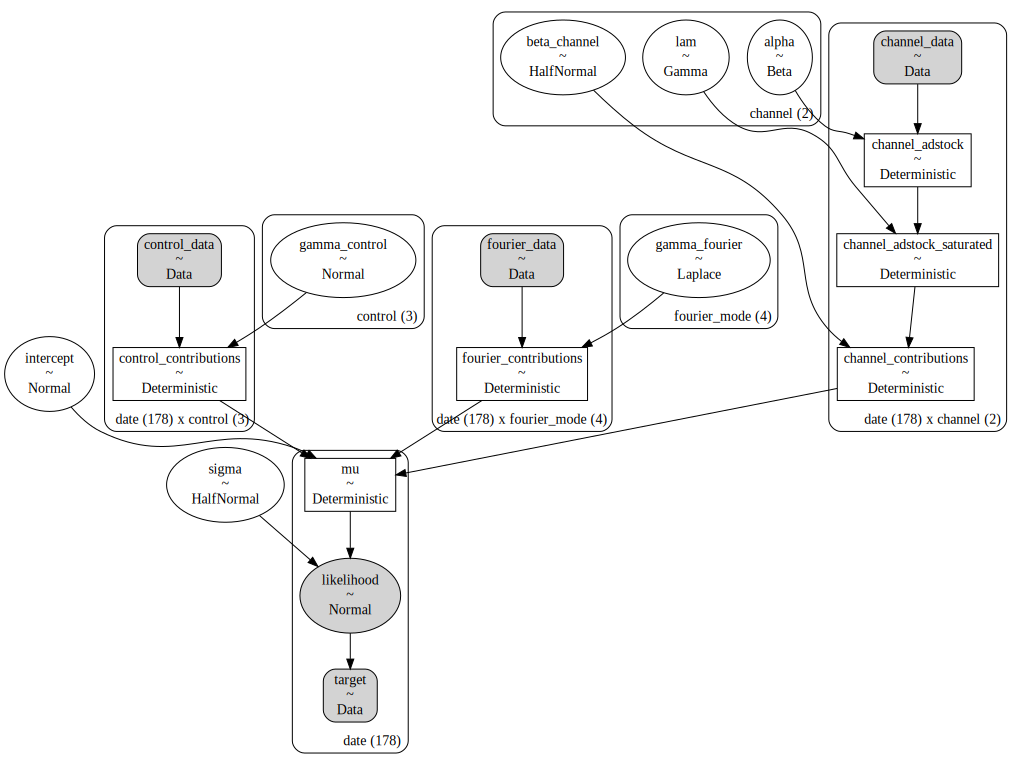

In [26]:
#DAGの確認
pm.model_to_graphviz(model=mmm.model)

Output()

'\nextend_idata=True：サンプリングされた予測データを既存のinferenceDataに追加\ncombined=True：複数のMCMCチェーンを一つにまとめる\n'

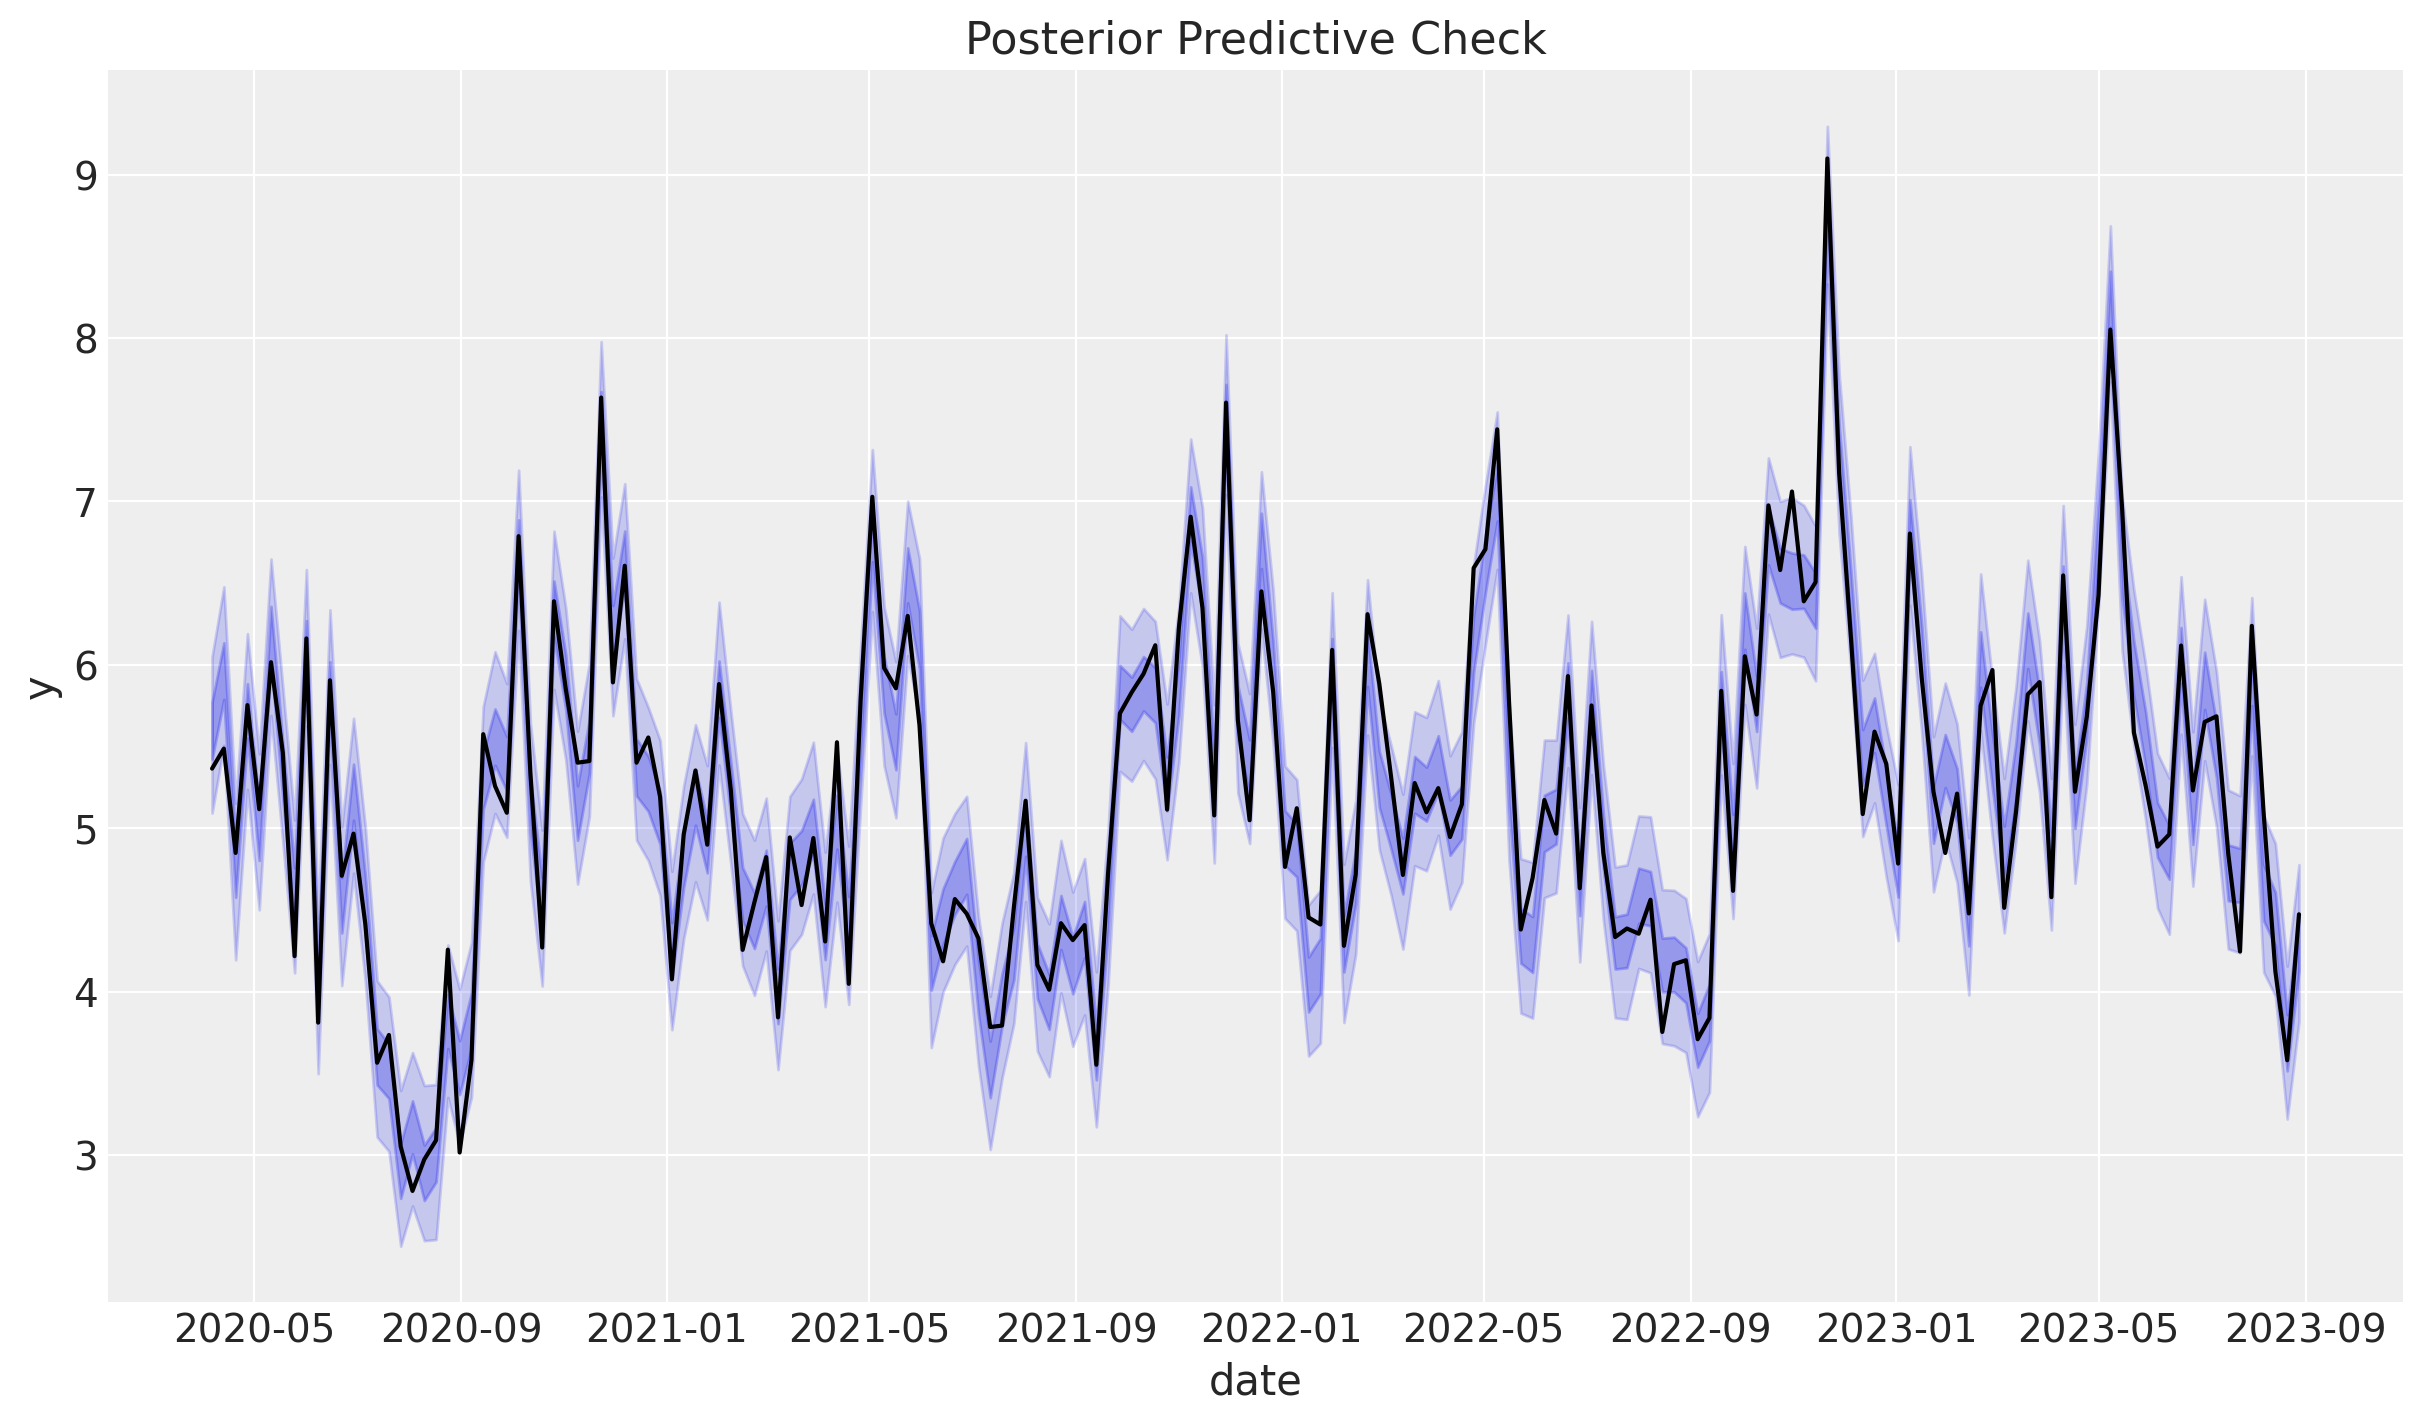

In [27]:
#予測値の可視化
mmm.sample_posterior_predictive(X, extend_idata=True, combined=True)
mmm.plot_posterior_predictive(original_scale=True);
'''
extend_idata=True：サンプリングされた予測データを既存のinferenceDataに追加
combined=True：複数のMCMCチェーンを一つにまとめる
'''

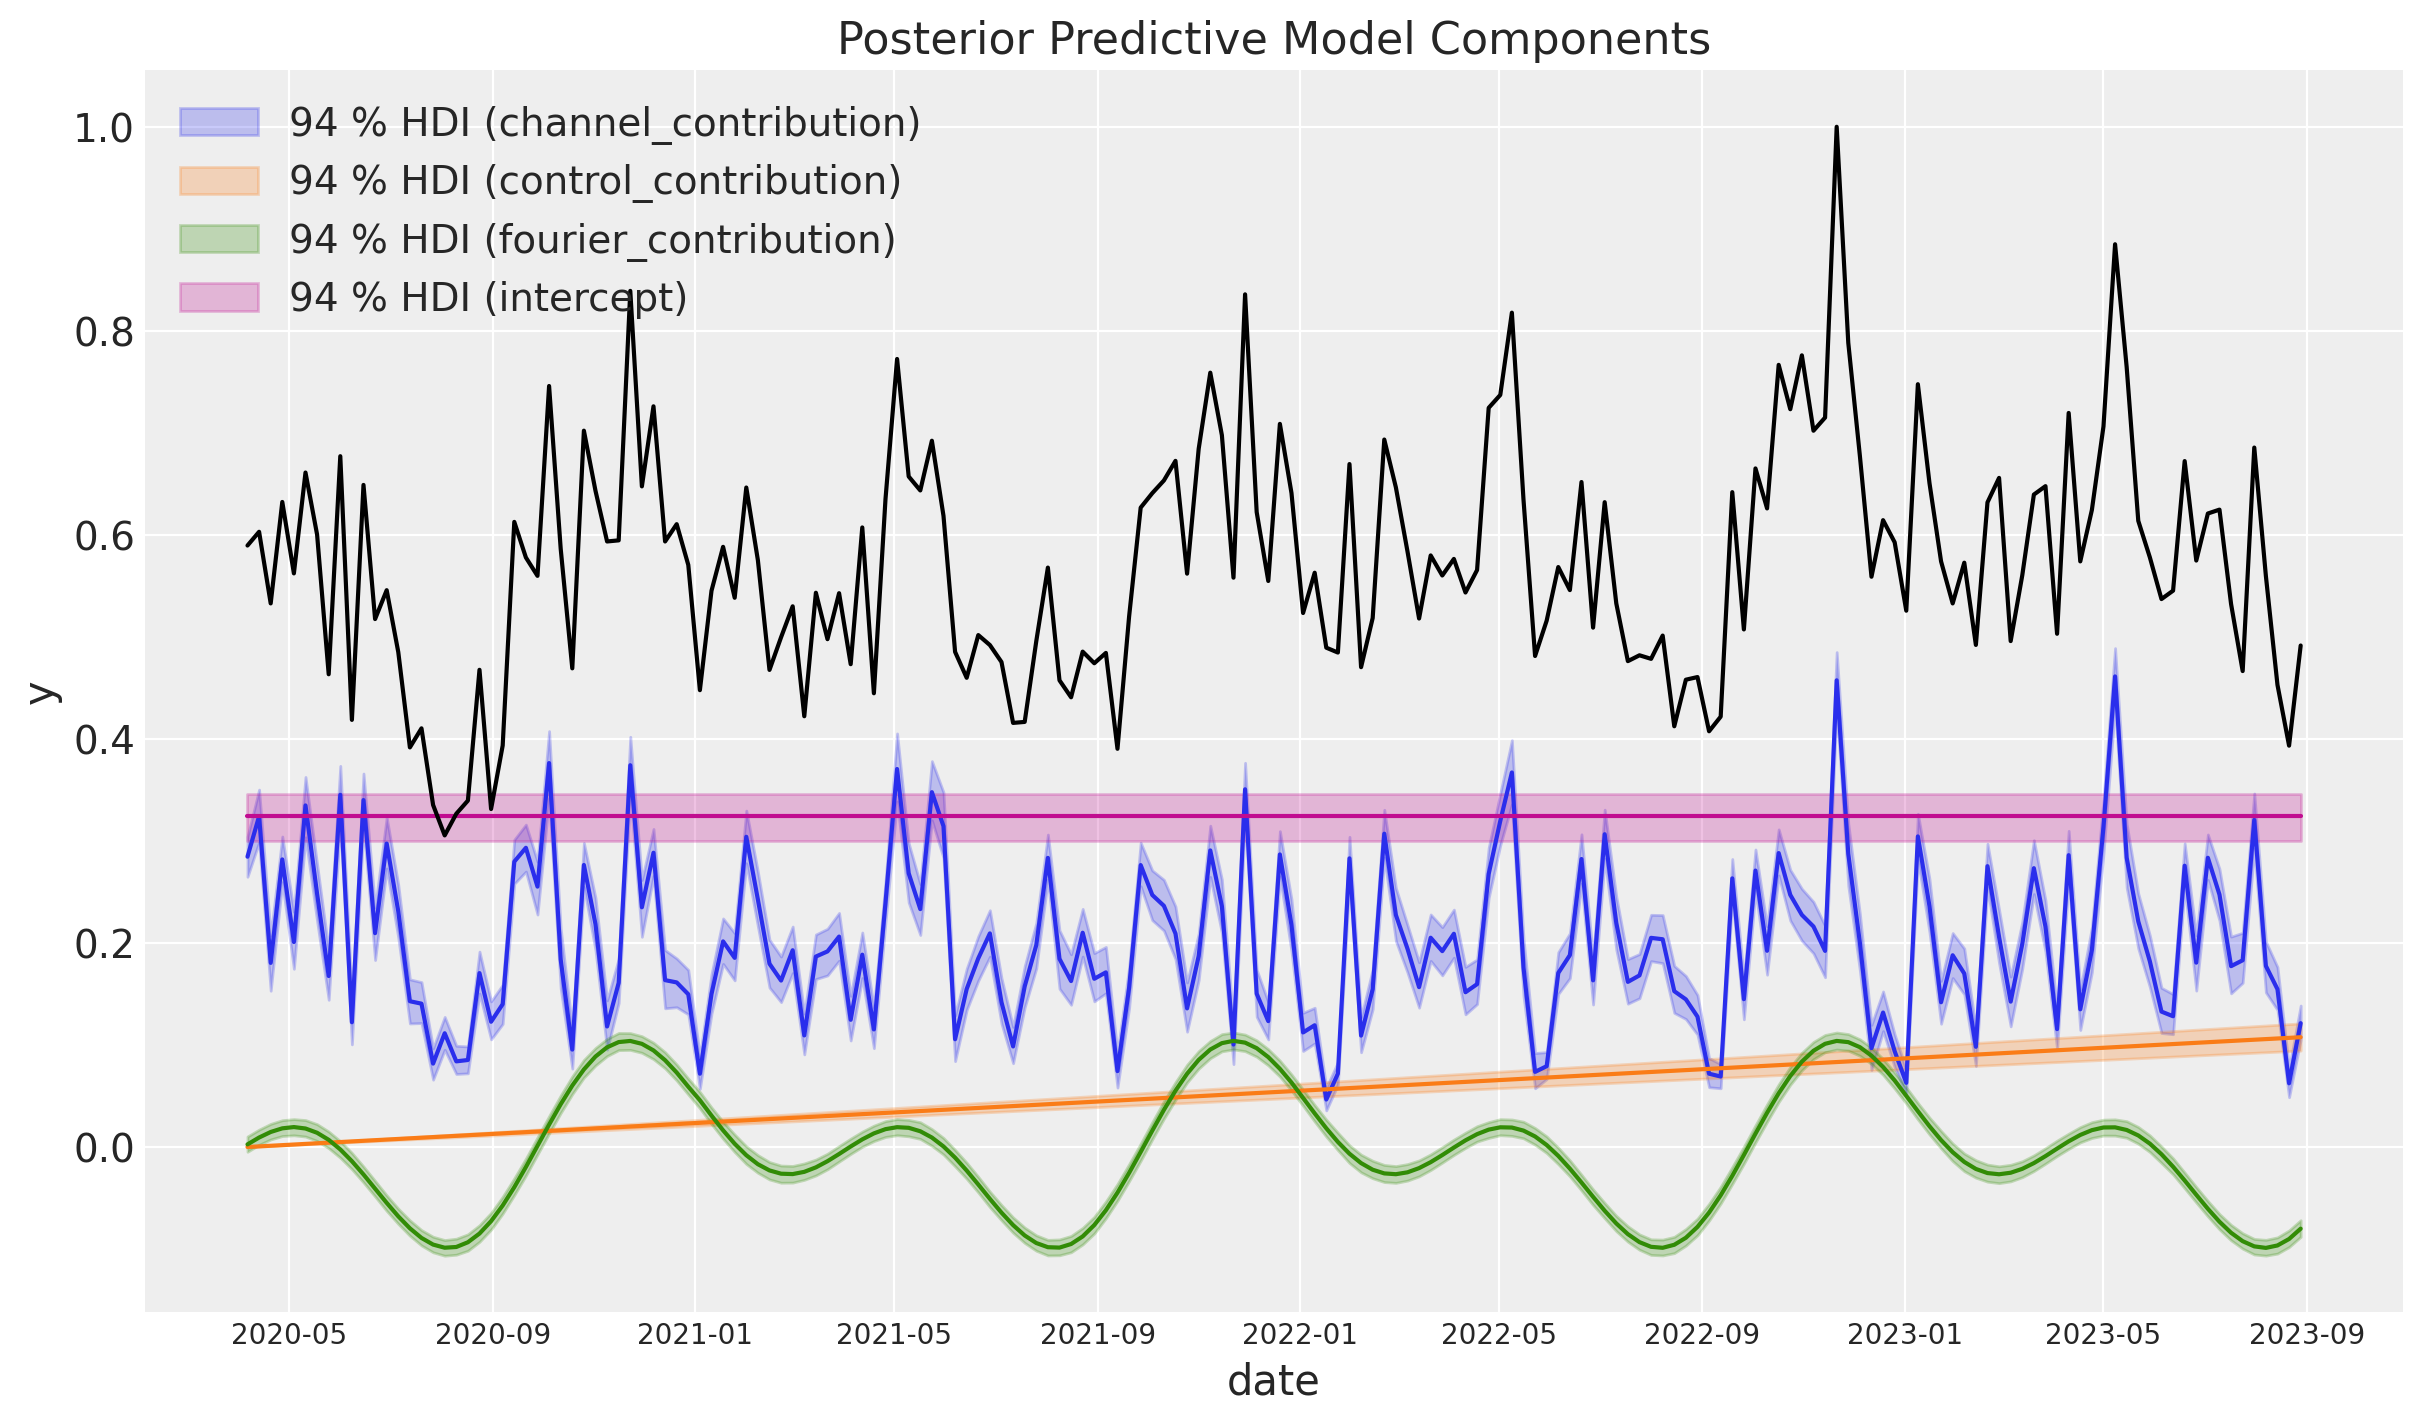

In [45]:
#各構成要素の寄与度の可視化

import matplotlib.pyplot as plt

# 一旦プロット
fig = mmm.plot_components_contributions()

# 各軸の凡例またはテキストラベルから `$` を除去
for ax in fig.get_axes():
    for text in ax.texts:
        text.set_text(text.get_text().replace('$', ''))  # または .replace('$', '\$')

    # 凡例の処理（ラベルの中の$を消す）
    handles, labels = ax.get_legend_handles_labels()
    labels = [label.replace('$', '') for label in labels]
    if handles:
        ax.legend(handles, labels)

plt.tick_params(axis='x', which='major', labelsize=10)
plt.show()


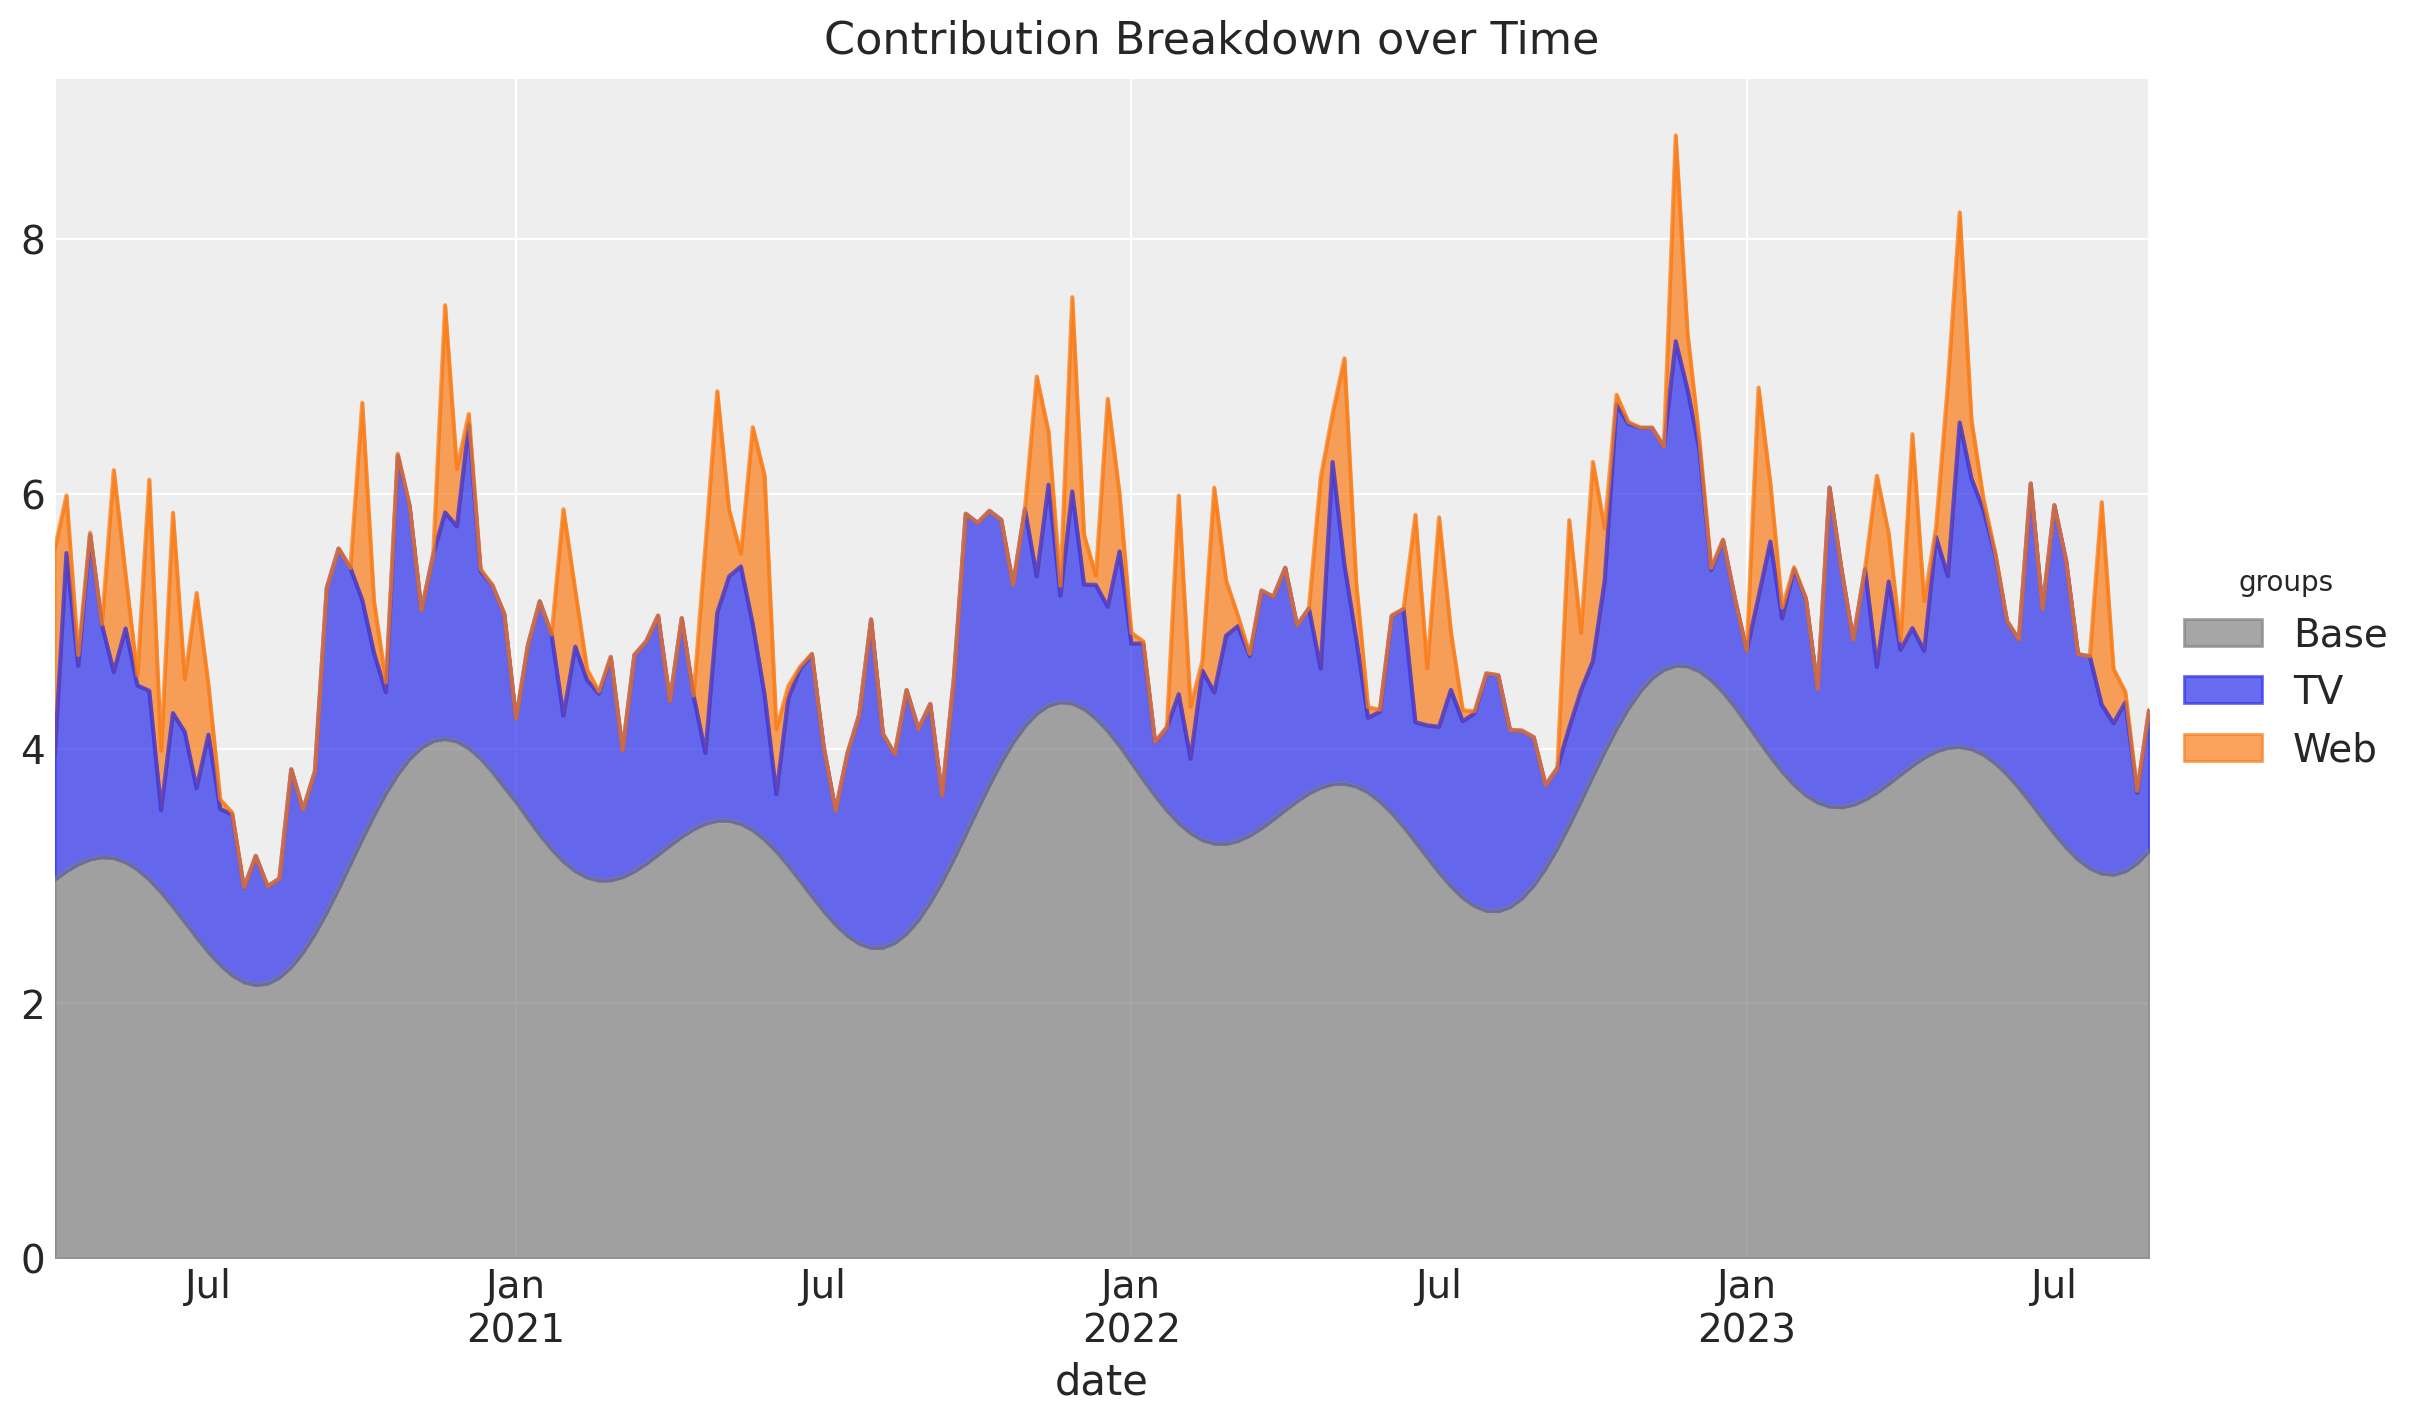

In [31]:
#TV,Webの寄与度の可視化
groups = {
    "Base": [
        "intercept",
        "event_1",
        "event_2",
        "t",
        "sin_order_1",
        "sin_order_2",
        "cos_order_1",
        "cos_order_2",
        ],
    "TV": ["tv"],
    "Web": ["web"],
}

fig = mmm.plot_grouped_contribution_breakdown_over_time(
    stack_groups=groups,
    original_scale=True,
    area_kwargs={
        "color": {
            "TV": "C0",
            "Web": "C1",
            "Base": "gray",
            "Seasonality": "black",
            },
        "alpha": 0.7,
        },
)

fig.suptitle("Contribution Breakdown over Time", fontsize=16);

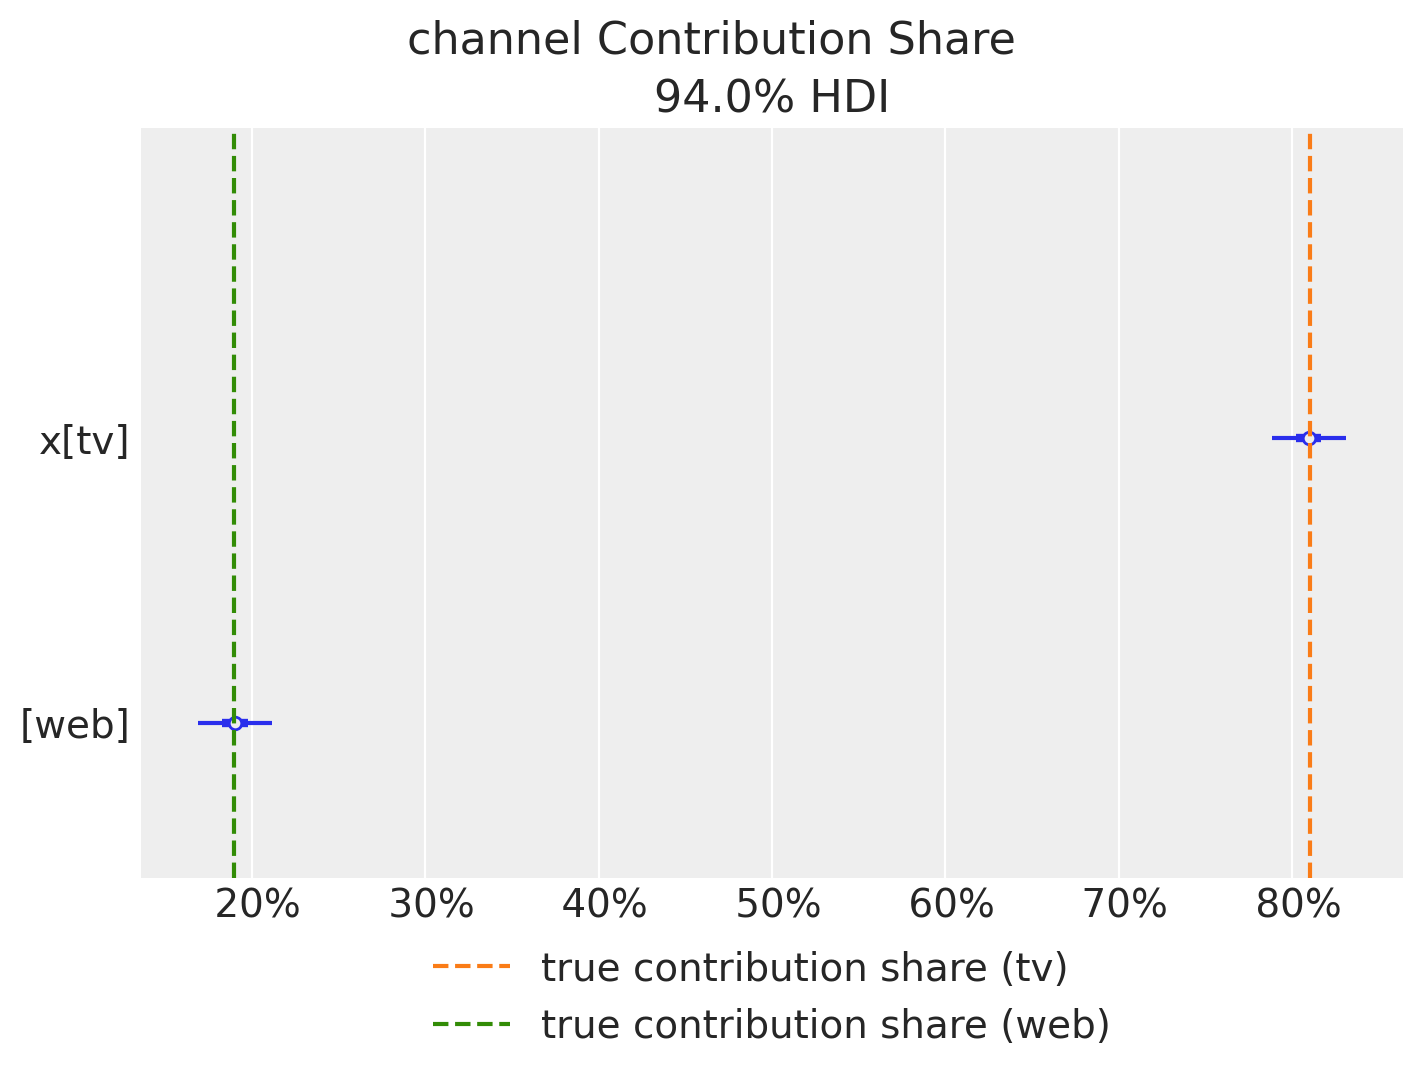

In [34]:
#時間経過にわたるメディアの寄与度の平均
get_mean_contributions_over_time_df = mmm.compute_mean_contributions_over_time(original_scale=True)

#メディア内のTV、Webのシェア推定
fig = mmm.plot_channel_contribution_share_hdi(figsize=(7, 5))
ax = fig.axes[0]
ax.axvline(
    x=contribution_share_tv,
    color="C1",
    linestyle="--",
    label="true contribution share (tv)",
)
ax.axvline(
    x=contribution_share_web,
    color="C2",
    linestyle="--",
    label="true contribution share (web)",
)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=1);

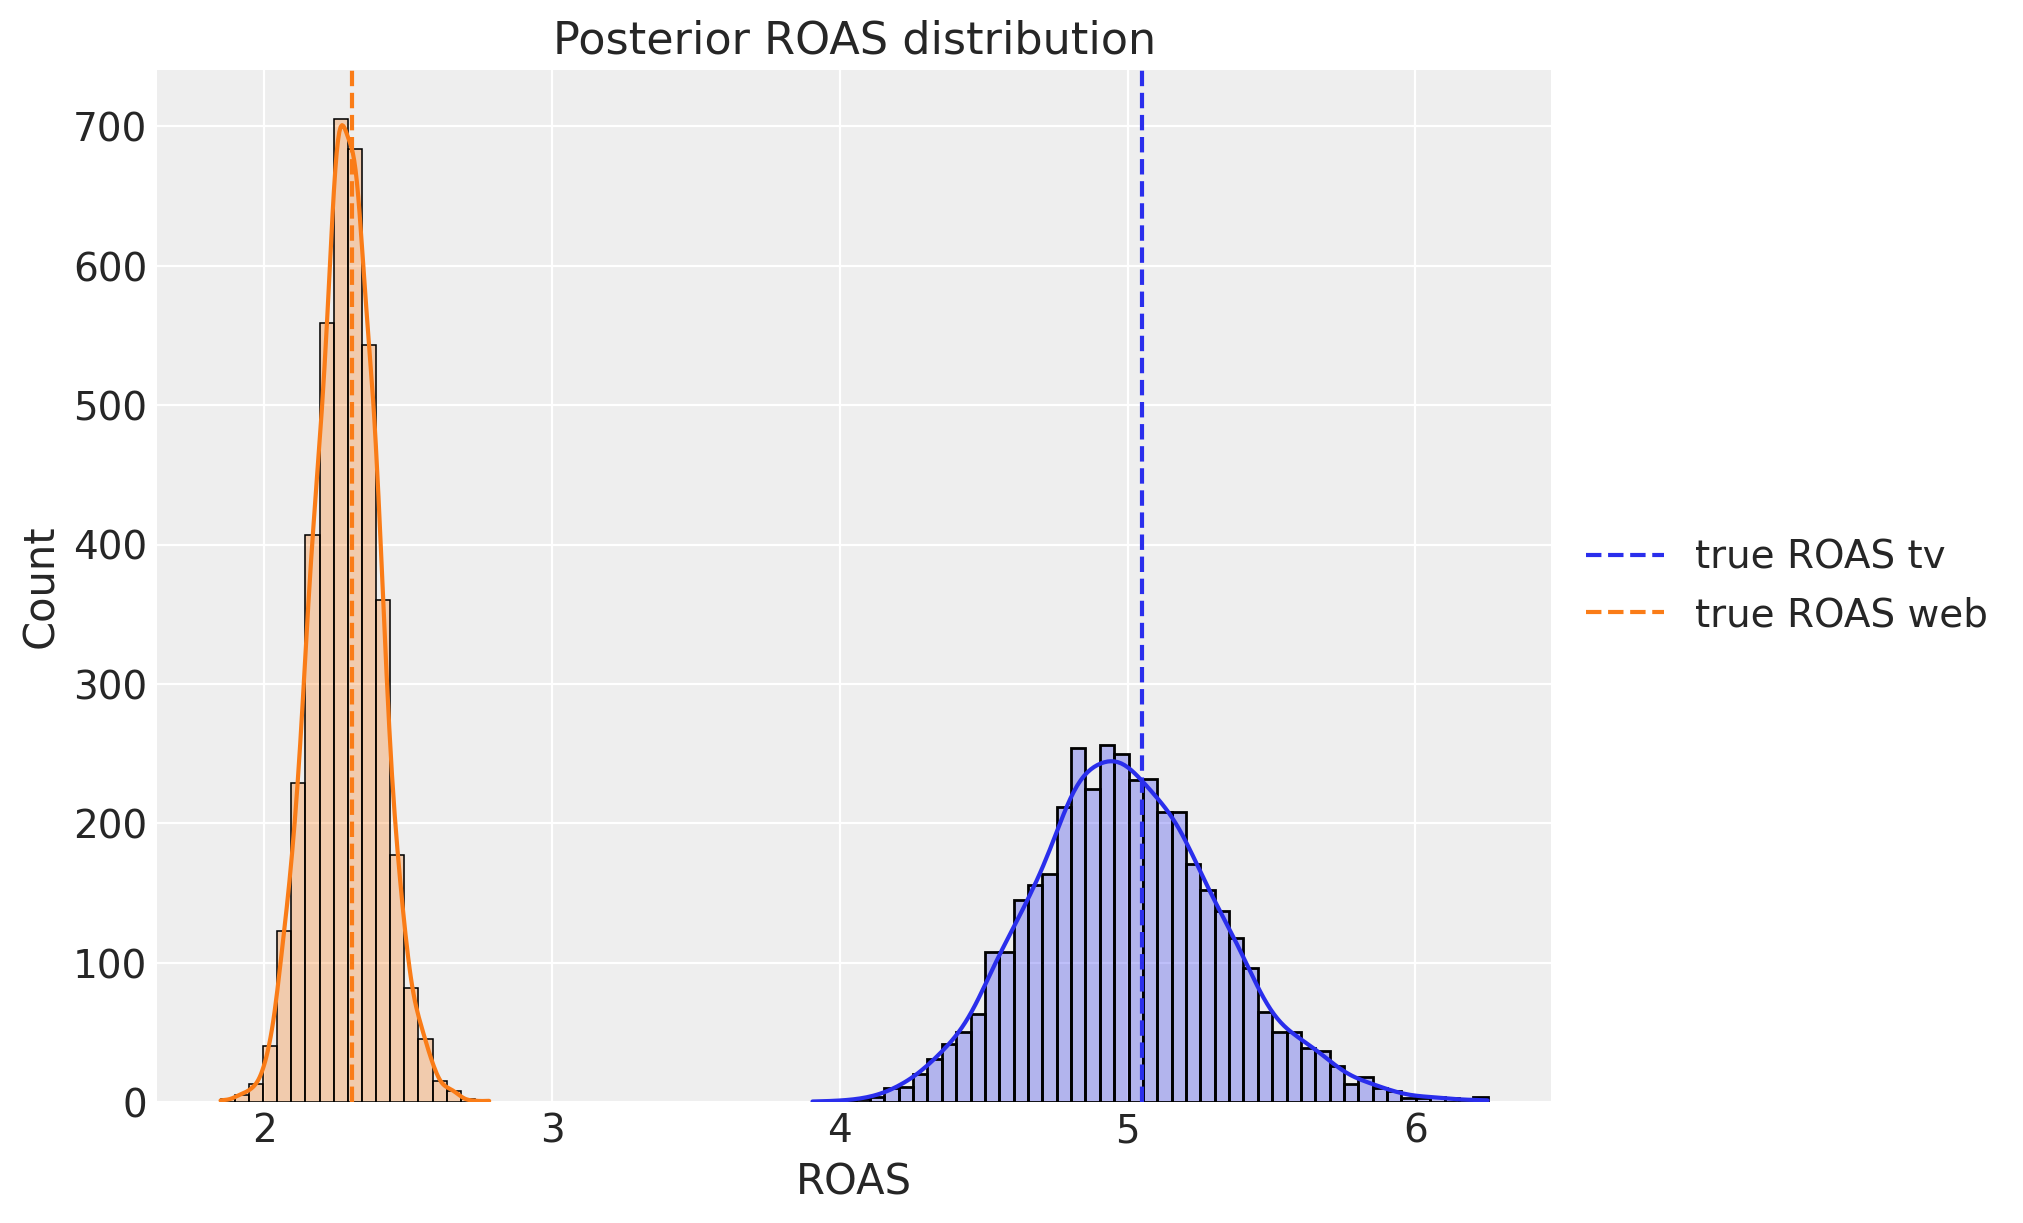

In [35]:
#ROASの推定
channel_contribution_original_scale = mmm.compute_channel_contribution_original_scale()
roas_samples = (channel_contribution_original_scale.stack(sample=("chain", "draw")).sum("date")/data[["tv", "web"]].sum().to_numpy()[..., None])
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(
roas_samples.sel(channel="tv").to_numpy(), binwidth=0.05, alpha=0.3,
kde=True, ax=ax
)
sns.histplot(
    roas_samples.sel(channel="web").to_numpy(), binwidth=0.05, alpha=0.3,kde=True, ax=ax
)
ax.axvline(x=roas_tv, color="C0", linestyle="--", label=r"true ROAS tv")
ax.axvline(x=roas_web, color="C1", linestyle="--", label=r"true ROAS web")
ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))
ax.set(title="Posterior ROAS distribution", xlabel="ROAS");

[MMMの課題]

識別仮定の確認：
1.   条件付き独立：施策の連動が発生
2.   選択バイアス：バックドア基準による修正方法
3.   分析対象の粒度

因果効果の推定：
1.   データ量
2.   インプットデータの相関による多重共線性
3.   モデルによる不確実性
4.   観測データ、シミュレーション範囲の限定